In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv("/Users/nanda/Downloads/car data.csv")

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
## CHecking the distribution of categorical data
print(df.Seller_Type.value_counts())
print(df.Fuel_Type.value_counts())
print(df.Transmission.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [16]:
     ## Encoding the categorical values
df.replace({"Fuel_Type":{"Petrol":0,"Deisel":1,"CNG":2}},inplace = True)
df.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace = True)
df.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace = True)

# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [19]:
X= df.drop(["Car_Name","Selling_Price"],axis =1)
y = df["Selling_Price"]

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2)

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
X_train_prediction = model.predict(X_train)
train_accuracy = r2_score(X_train_prediction,y_train)

In [32]:
train_accuracy

0.863565550919904

<AxesSubplot:xlabel='Selling_Price'>

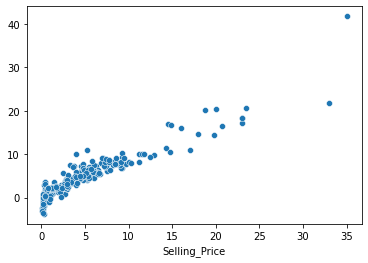

In [35]:
## VIsualize the actual and original prices
sns.scatterplot(x= y_train,y= X_train_prediction)

In [34]:
X_test_prediction = model.predict(X_test)
test_accuracy = r2_score(y_test,X_test_prediction)

In [36]:
test_accuracy

0.8365766715026477

/Users/nanda/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

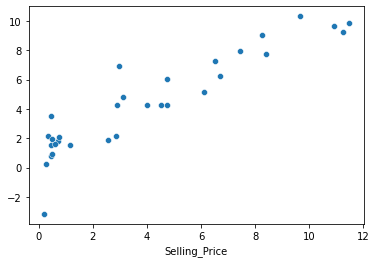

In [37]:
sns.scatterplot(y_test,X_test_prediction)

In [38]:
model2 = Lasso()

In [40]:
model2.fit(X_train,y_train)

Lasso()

In [41]:
X_train_prediction2 = model2.predict(X_train)
train_accuracy2=r2_score(X_train_prediction2,y_train)

In [42]:
train_accuracy2

0.798459024070425

/Users/nanda/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

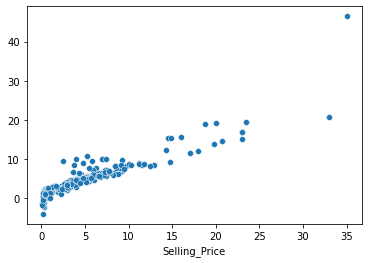

In [43]:
sns.scatterplot(y_train,X_train_prediction2)

In [46]:
X_test_prediction2=model.predict(X_test)
acuu = r2_score(X_test_prediction2,y_test)
acuu

0.8062199941176211

/Users/nanda/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

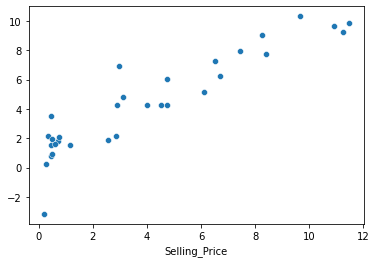

In [47]:
sns.scatterplot(y_test,X_test_prediction2)

In [49]:
import xgboost as xgb

In [50]:
model3 = xgb.(X_train)

AttributeError: module 'xgboost' has no attribute 'fit'